<a href="https://colab.research.google.com/github/BerryLeeYY/GRF-prediction-LSTM/blob/main/GRF_prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict ground reaction force based on kinematic singal during gait
## Introduction
Kinematic and GRF are the information when it comes to movement analysis. Such as gait analysis, the researchers use GRF signal to determine the gait phase. However, it is difficult to collect all information because of the high cost of the equipment. Thanks for the advanced technology, nowaday people can easyily gather the kinematic data by using IMU or a video motion capture system. Therefore, in this project, I am going to show you how to use kinematic signal to predict GRF signal by using LSTM.
## Aim
Predict GRF signal by using LSTM
## Dataset
* Resource         :https://www.kaggle.com/datasets/dasmehdixtr/human-gait-phase-dataset?resource=download&select=GaitPhase_Desc.pdf
* Gender           : 10 male 11 females
* Age              : 23.8 yrs ± 3.3 yrs
* Tasks            : Gait
* Signal recording : kinematic & GRF


### Load the relevant package

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
import tensorflow as tf

### Data loading and processing

In [ ]:
x_train = np.load("data/x_training.npy")
y_train = np.load("data/y_training.npy")
x_test = np.load("data/x_testing.npy")
y_test = np.load("data/y_testing.npy")

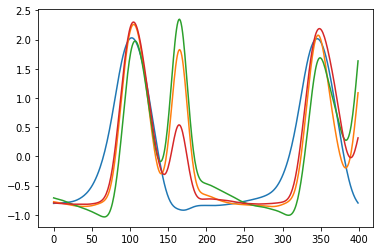

In [ ]:
plt.plot(x_train[460])


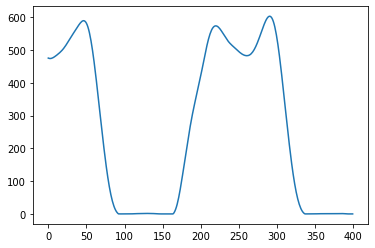

In [ ]:
plt.plot(y_train[460])

### Building LSTM model 

In [ ]:
### Train the trained model or start from beginning
# loaded_model = tf.keras.models.load_model('4_features_50_lstm_1_0.2_drop_1_dense')

In [ ]:
# define model
n_steps=400
n_features=4
model = Sequential()
model.add(LSTM(50, activation='sigmoid', return_sequences=True, input_shape=(n_steps,n_features)))
model.add(Dropout(0.2))
model.add(Dense(1, activation="relu"))
opt = optimizers.Adam(lr=0.01)
model.compile(optimizer=opt, loss='mse')

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 400, 50)           11000     
                                                                 
 dropout (Dropout)           (None, 400, 50)           0         
                                                                 
 dense (Dense)               (None, 400, 1)            51        
                                                                 
Total params: 11,051
Trainable params: 11,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train[:500], y_train[:500], batch_size = 20, epochs=1000)

Epoch 1/5
25/25 [==============================] - 5s 137ms/step - loss: 197267.2812
Epoch 2/5
25/25 [==============================] - 3s 134ms/step - loss: 190753.9375
Epoch 3/5
25/25 [==============================] - 3s 132ms/step - loss: 184786.1094
Epoch 4/5
25/25 [==============================] - 4s 149ms/step - loss: 179169.2656
Epoch 5/5
25/25 [==============================] - 3s 133ms/step - loss: 173729.7344


### Model evaluation

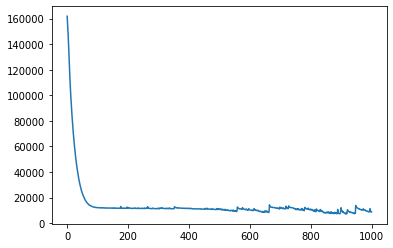

In [ ]:
plt.plot(history.history["loss"])

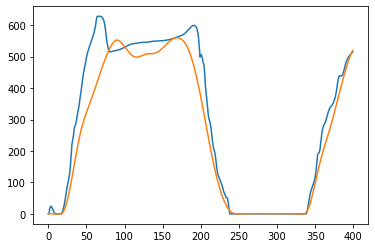

In [ ]:
index = 800
prediction = model.predict(x_test[index].reshape((1,400,4)))
plt.plot(prediction.reshape((400)))
plt.plot(y_test[index])